In [1]:
# These are the required imports for our data loading

import os
import numpy as np
from PIL import Image
from tqdm import tqdm

In [2]:
DATA_DIR = 'Train1' # This is our data directory in our root dr
IMG_SIZE = 28 # We will resize all images to 28x28
# why 28x28? --> this is the size of the MNIST dataset
# and also this is a really good general size, not too small, not too big
# Also we will avoid overfitting, and really big matrices.

OUTPUT_FEATURES_FILE = 'features_X.npy' # We create the features file
OUTPUT_LABELS_FILE = 'labels_y.npy' # We create the labels file

In [3]:
def create_dataset_from_folders(data_dir):
    """
    This function iterates through the given directory and it's sub directories,
    and processes each image file, it returns a feature and a label array.
    """

    # These are the arrays, where we will collect our data
    image_data_list = []
    label_list = []

    # This line of code gives us a list of all the sub directories in our data directory
    # We sort these directories, so the order will be correct sample001 will recieve the 0 label ETC.
    sample_folders = sorted(os.listdir(data_dir))

    # We create our label map, {Sample001: 0, Sample002: 1, ETC}
    label_map = {folder_name: i for i, folder_name in enumerate(sample_folders)}

    print(f"processing the directories  of {data_dir}...")
    print(f"Found labels: {len(label_map)}")

    # with tqdm we can see the progress of our processing
    for folder_name in tqdm(sample_folders, desc="Processing folders"):
        # This will be the path to our folder, for instance: Train1/Sample001
        folder_path = os.path.join(data_dir, folder_name)

        # If something is not a directory, we skip it
        if not os.path.isdir(data_dir):
            continue

        # this is our current label
        current_label = label_map[folder_name]

        # We iterate through all the images in our sample folder
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)

            try:
                # We open the image file
                img = Image.open(image_path)

                img = img.convert('L')  # Convert to grayscale(black and white)

                img = img.resize((IMG_SIZE, IMG_SIZE)) # Resize to IMG_SIZExIMG_SIZE

                pixel_array = np.array(img) # Convert to numpy array

                flattened_pixel_array = pixel_array.flatten() # Flatten the array 2D --> 1D

                # Append our data to our lists
                image_data_list.append(flattened_pixel_array)
                label_list.append(current_label)

            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

    # Convert lists to numpy arrays
    features_X = np.array(image_data_list)
    labels_y = np.array(label_list)

    return features_X, labels_y, label_map


In [4]:
X_data, y_data, labels = create_dataset_from_folders(DATA_DIR)

processing the directories  of Train1...
Found labels: 62


Processing folders: 100%|██████████| 62/62 [02:04<00:00,  2.01s/it]


In [5]:
print("\nFeldolgozás befejezve!")
print(f"Képek (X) formátuma: {X_data.shape}") # Pl. (50000, 784)
print(f"Címkék (y) formátuma: {y_data.shape}")   # Pl. (50000,)


Feldolgozás befejezve!
Képek (X) formátuma: (53172, 784)
Címkék (y) formátuma: (53172,)


In [6]:
# Save our data for later, because npy is faster than csv
np.save(OUTPUT_FEATURES_FILE, X_data)
np.save(OUTPUT_LABELS_FILE, y_data)

In [7]:
# For visualization purposes
import matplotlib.pyplot as plt

In [8]:
# We load our data from npy
X_data = np.load(OUTPUT_FEATURES_FILE)
y_data = np.load(OUTPUT_LABELS_FILE)

In [9]:
image_index = 23009 # You can change this number to visualize other images
single_image = X_data[image_index] # This is a 1D array
label = y_data[image_index] # This is the label

In [10]:
# We need to reshape the 1D array back to 2D for visualization
image_2d = single_image.reshape((IMG_SIZE, IMG_SIZE))

Label: 27 at index 23009


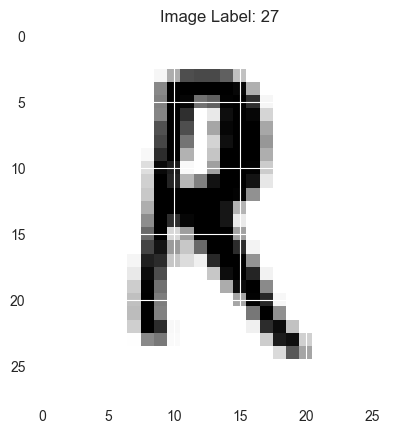

In [11]:
print(f"Label: {label} at index {image_index}")
plt.imshow(image_2d, cmap='gray')
plt.title(f"Image Label: {label}")
plt.show()

In [12]:
# We need to scale the pixel values to [0, 1] range
X_data_normalized = X_data / 255.0

In [13]:
# We split our data into training and testing sets
from sklearn.model_selection import train_test_split

In [14]:
# We will split 80% training and 20% testing
# random_state is set for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_data_normalized, y_data, test_size=0.2, random_state=42)

In [15]:
# We will use a neural network classifier
from sklearn.neural_network import MLPClassifier

In [16]:
model = MLPClassifier(
    hidden_layer_sizes=(128, 64), # Hidden layer size
    max_iter = 2000, # epoch size
    random_state=42,
    verbose=True, # Print progress
)

In [ ]:
# We will train our model now
model.fit(X_train, y_train)

Iteration 1, loss = 2.57260550
Iteration 2, loss = 1.18266608
Iteration 3, loss = 0.96307004
Iteration 4, loss = 0.85859389
Iteration 5, loss = 0.79445292
Iteration 6, loss = 0.74857894
Iteration 7, loss = 0.71953811
Iteration 8, loss = 0.69116480
Iteration 9, loss = 0.66681790
Iteration 10, loss = 0.64547803
Iteration 11, loss = 0.62806570
Iteration 12, loss = 0.60613231
Iteration 13, loss = 0.59818357
Iteration 14, loss = 0.57857098
Iteration 15, loss = 0.56330229
Iteration 16, loss = 0.55249121
Iteration 17, loss = 0.54312055
Iteration 18, loss = 0.52761924
Iteration 19, loss = 0.51907935
Iteration 20, loss = 0.50762237
Iteration 21, loss = 0.49946576
Iteration 22, loss = 0.49165980
Iteration 23, loss = 0.48034827
Iteration 24, loss = 0.47623898
Iteration 25, loss = 0.46387630
Iteration 26, loss = 0.45542545
Iteration 27, loss = 0.45370902
Iteration 28, loss = 0.44019908
Iteration 29, loss = 0.43854965
Iteration 30, loss = 0.42752845
Iteration 31, loss = 0.42456144
Iteration 32, los

In [179]:
# We will test our model now
# We will create a prediction for our X_test data set
y_pred = model.predict(X_test)
print(f" our prediction: {y_pred[5:]}")
print(f" our actual: {y_test[5:]}")


 our prediction: [25 12 52 ...  7 30 10]
 our actual: [25 12 52 ...  7 30 10]


In [180]:
# We will calculate the accuracy of our model
from sklearn.metrics import accuracy_score

# accuracy_score calculates the accuracy of our model
# with the help of the true labels (y_test) and our predictions (y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8770098730606488

In [176]:
from sklearn.metrics import classification_report

# We will print a detailed classification report
report = classification_report(y_test, y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.74      0.85      0.79       190\n           1       0.84      0.86      0.85       170\n           2       0.95      0.99      0.97       159\n           3       0.99      0.98      0.98       162\n           4       0.89      0.96      0.93       176\n           5       0.99      0.94      0.96       170\n           6       0.89      0.99      0.94       166\n           7       0.98      0.97      0.98       192\n           8       0.92      0.97      0.94       208\n           9       0.97      0.95      0.96       152\n          10       0.96      0.97      0.97       183\n          11       0.98      0.90      0.94       154\n          12       0.71      0.83      0.77       183\n          13       0.99      0.91      0.95       147\n          14       0.95      0.93      0.94       146\n          15       0.94      0.95      0.94       159\n          16       0.92      0.97      0.95       177\n       

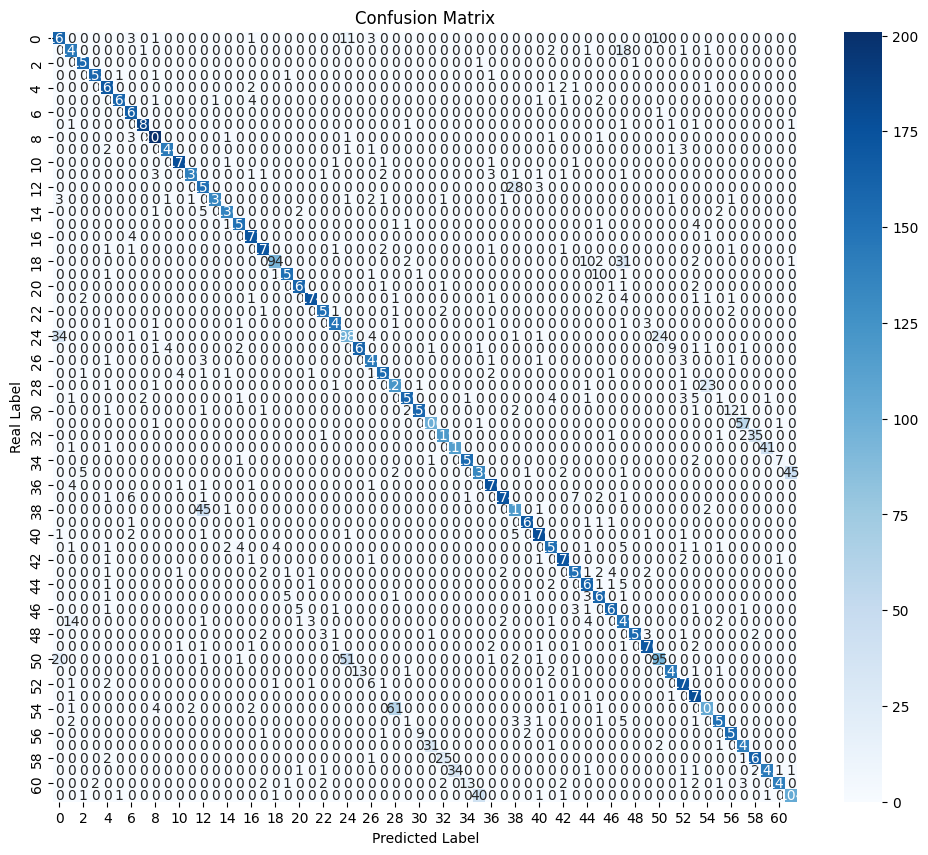

In [177]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# We will create a confusion matrix
# To visualize the performance of our model

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Real Label')
plt.xlabel('Predicted Label')
plt.show()

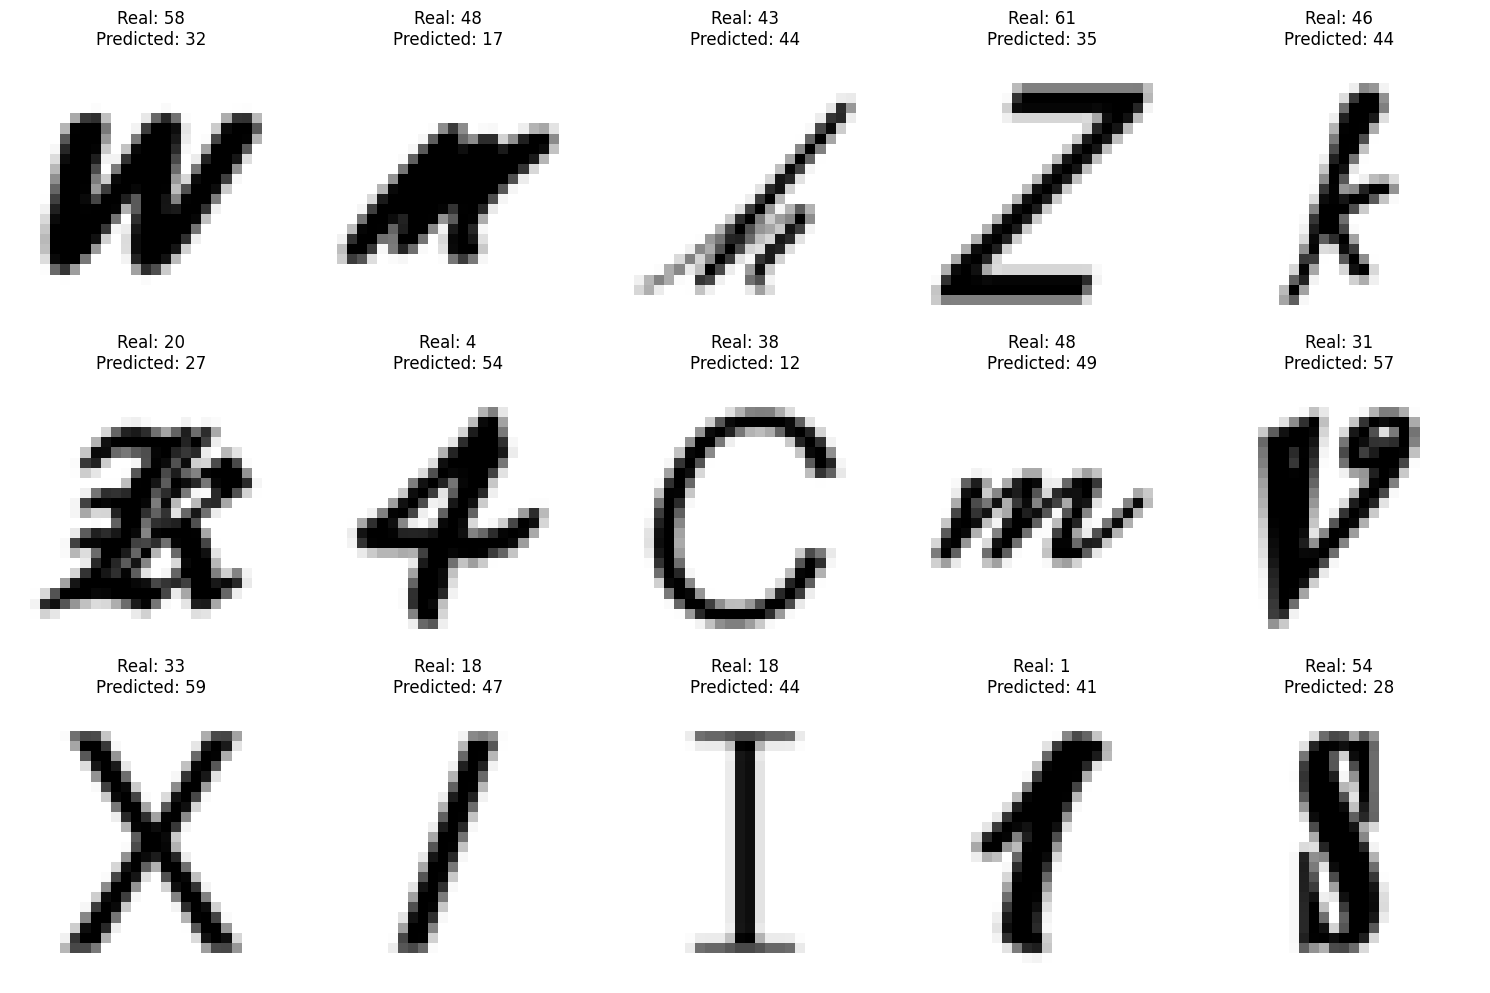

In [178]:
# We will now visalize some of the misclassified images

# We will find the indices of the misclassified images
# A missclassified image is an image that our model predicted incorrectly
misclassified_indices = np.where(y_pred != y_test)[0]

# We will select 20 random misclassified images
random_misclassified = np.random.choice(misclassified_indices, size=20, replace=False)

# We will plot the 20 misclassified images
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
for i, ax in enumerate(axes.flatten()):
    idx = random_misclassified[i]
    image = X_test[idx].reshape((IMG_SIZE, IMG_SIZE)) # Reshape back to 2D

    ax.imshow(image, cmap='gray')
    ax.set_title(f"Real: {y_test[idx]}\nPredicted: {y_pred[idx]}")
    ax.axis('off')

plt.tight_layout()
plt.show()